In [3]:
import pandas as pd

# Load the dataset using raw string literal
dataset = pd.read_excel(r"C:\Users\PRAVALLIKA\Desktop\house price prediction\HousePricePrediction (1).xlsx")

# Print the first 5 records of the dataset
print(dataset.head(5))


   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [4]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 4
Integer variables: 0
Float variables: 3


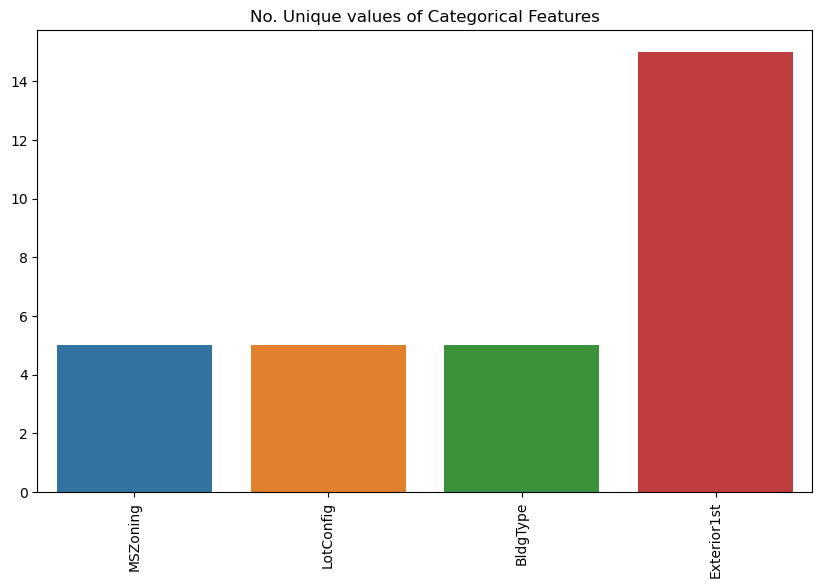

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

unique_values = []
for col in object_cols:
    unique_values.append(dataset[col].nunique())  # Use nunique() instead of unique().size
plt.figure(figsize=(10, 6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols, y=unique_values)
plt.show()


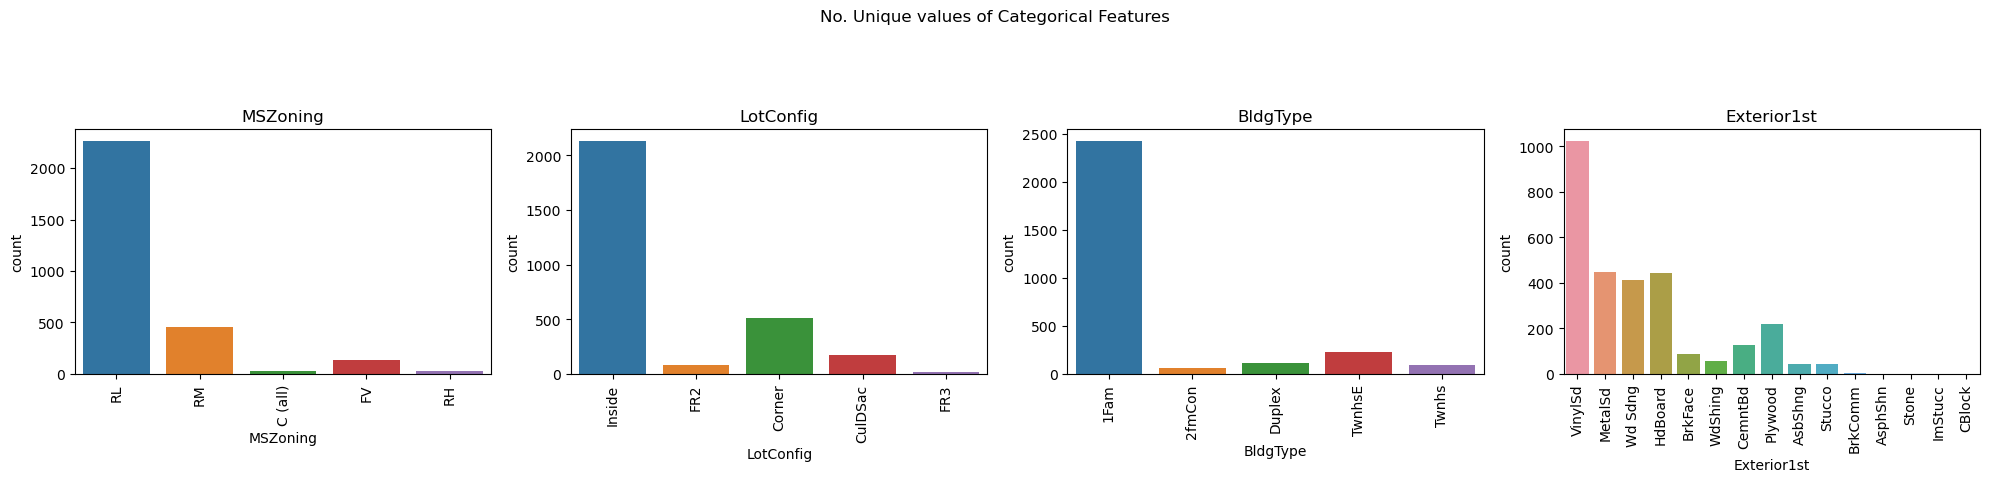

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

unique_values = []
for col in object_cols:
    unique_values.append(dataset[col].nunique())

plt.figure(figsize=(20, 40))  # Adjust the figure size as needed
plt.suptitle('No. Unique values of Categorical Features')

for index, col in enumerate(object_cols, start=1):
    plt.subplot(11, 4, index)
    plt.title(col)
    sns.countplot(data=dataset, x=col)
    plt.xticks(rotation=90)

# Remove any extra subplot that may be present
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


In [13]:
if 'Id' in dataset.columns:
    dataset.drop(['Id'], axis=1, inplace=True)
    print("'Id' column dropped successfully.")
else:
    print("'Id' column not found in the dataset.")


'Id' column not found in the dataset.


In [14]:
dataset['SalePrice'] = dataset['SalePrice'].fillna(
dataset['SalePrice'].mean())A

In [15]:
new_dataset = dataset.dropna() 

In [16]:
new_dataset.isnull().sum() 

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [17]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
len(object_cols))
#print number of categorical features and variables

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [20]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Initialize the OneHotEncoder with sparse_output=False
OH_encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the OneHotEncoder on the categorical columns
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))

# Set the index of OH_cols to match the index of the original dataset
OH_cols.index = new_dataset.index

# Get the names of the new one-hot encoded columns
OH_col_names = OH_encoder.get_feature_names_out(object_cols)

# Set the column names of OH_cols
OH_cols.columns = OH_col_names

# Drop the original categorical columns from the dataset
df_final = new_dataset.drop(object_cols, axis=1)

# Concatenate the one-hot encoded columns with the original dataset
df_final = pd.concat([df_final, OH_cols], axis=1)


In [21]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

# Split the training set into
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
	X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [22]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)
#printing the absolute percentage
print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.1870512931870423
